# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [ ]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


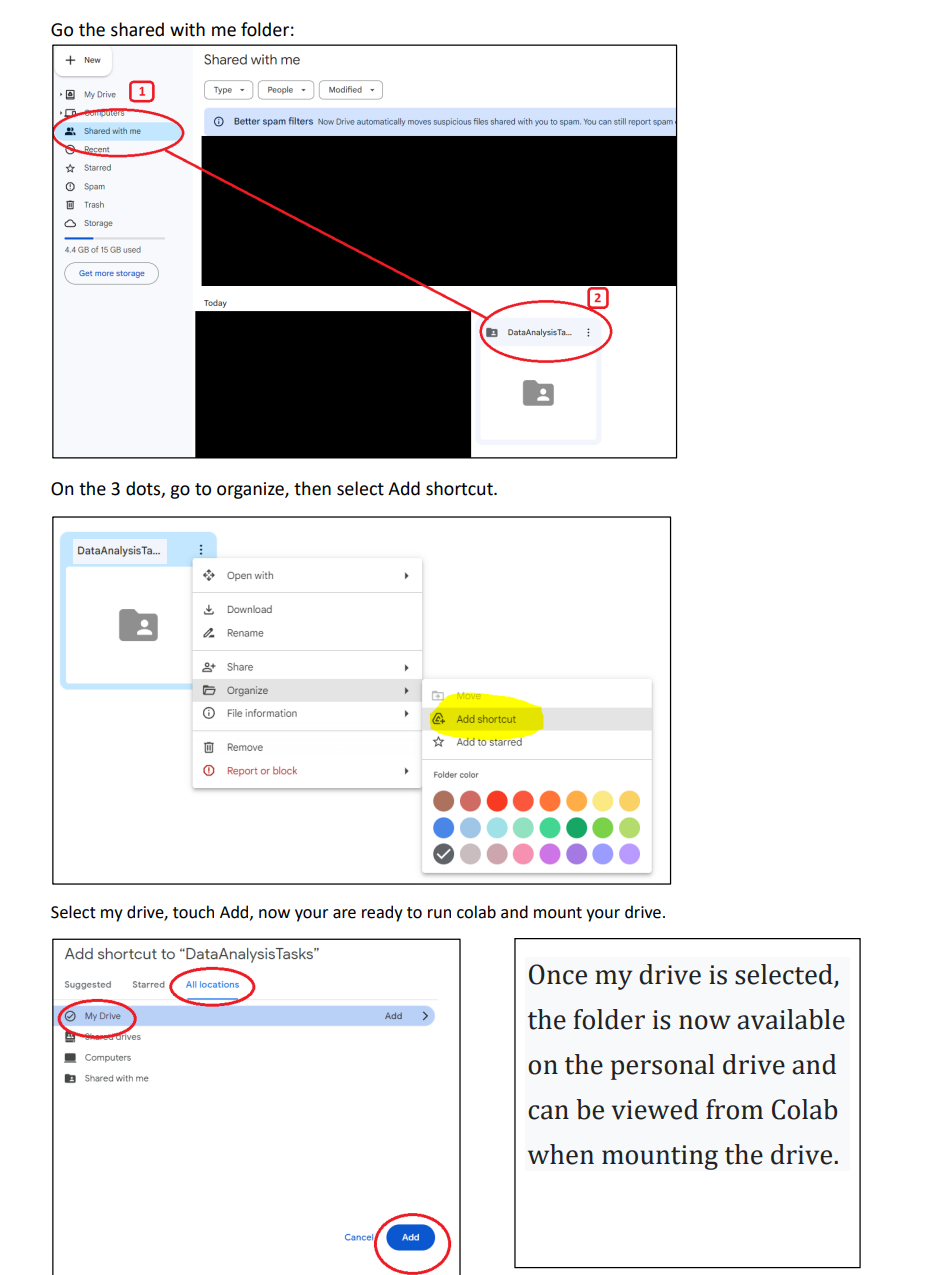

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/Automobile.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [ ]:
from bokeh.io import output_notebook
output_notebook()

-------------------------------------------------------------------------------------------------------------------




---



**AFTER THIS POINT YOU CAN START WORKING**

---








## 1. Data Manipulation

**Prompt**:

I will provide you with data related to Bigfoot Sightings. I need you to plot a scattering distribution for the sightings, including a geographical coordinate (search only in the following ranges, latitude range: (33, 40) and longitude range:(-108, -104)) and timestamps. You should plot the scatter dots between the years 1980 and 2000. I need you to use several colormaps following the next rules:

- For each colormap category and colormap in the list, the code generates a scatter plot.
- Each point on the scatter plot represents a Bigfoot sighting with its latitude and longitude coordinates.
- The color of each point is determined by the year of the sighting and corresponds to a specific colormap.
- A colorbar legend is included to indicate the mapping between colors and years.
- Displays the scatter plots with different colormaps.

Bring me the Python code for this task.

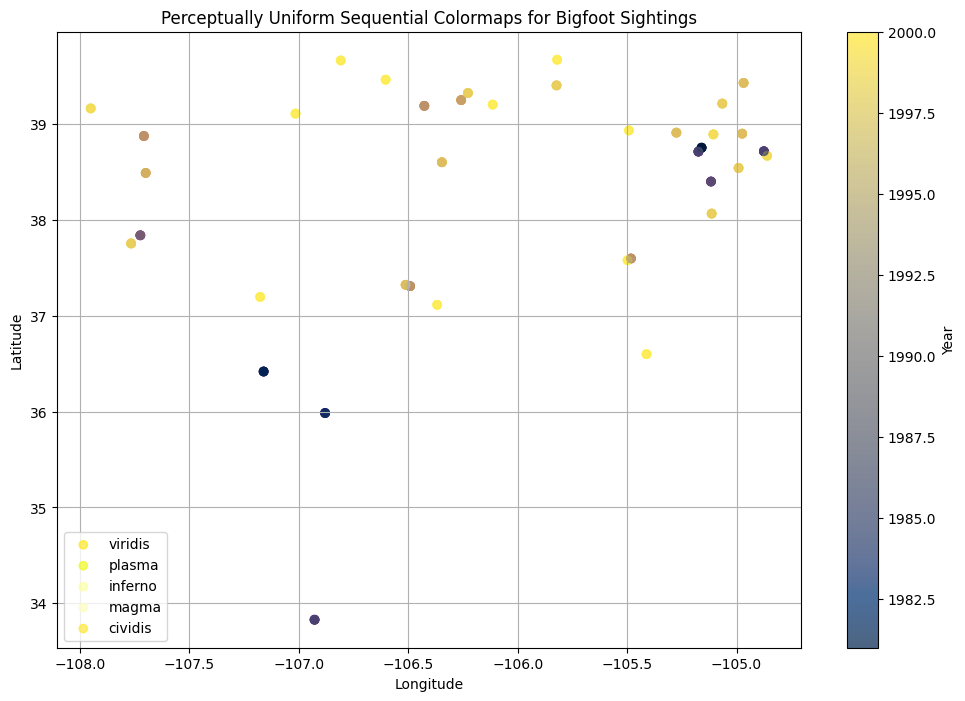

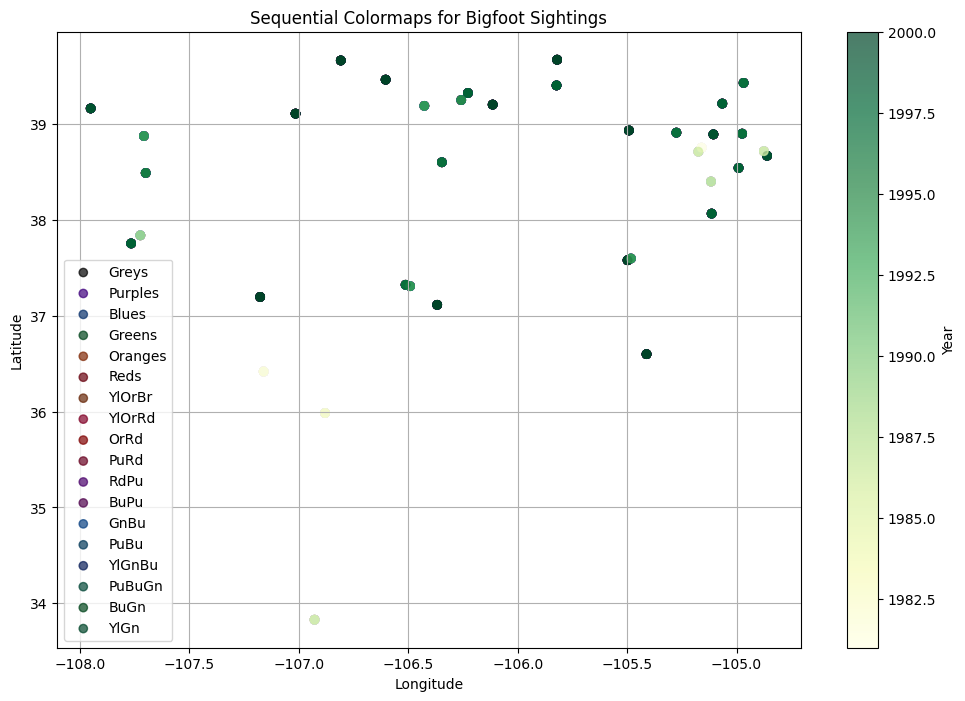

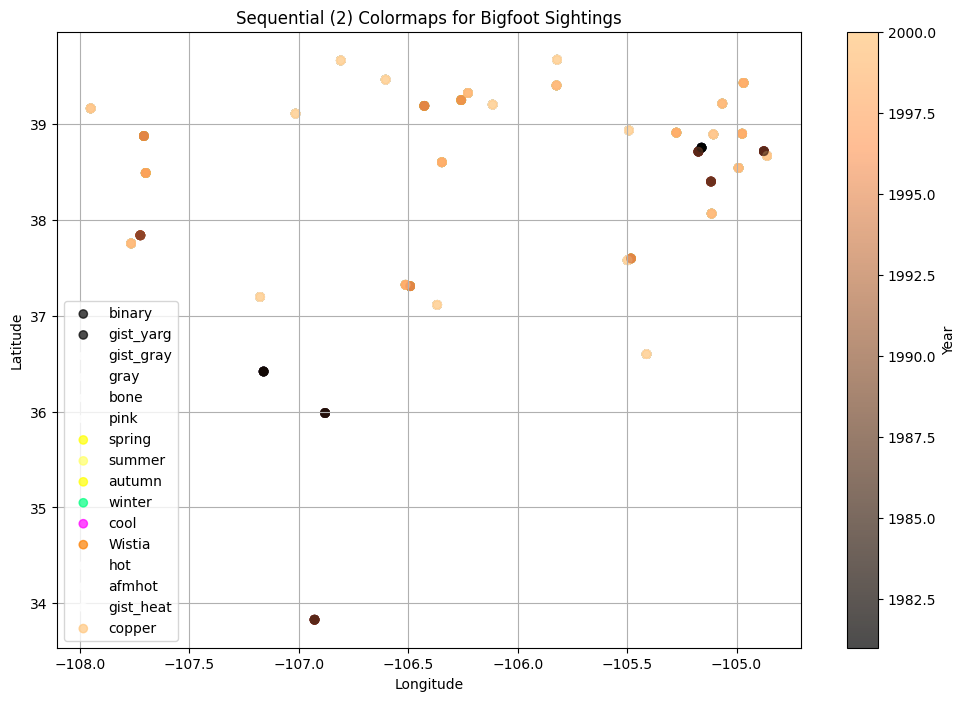

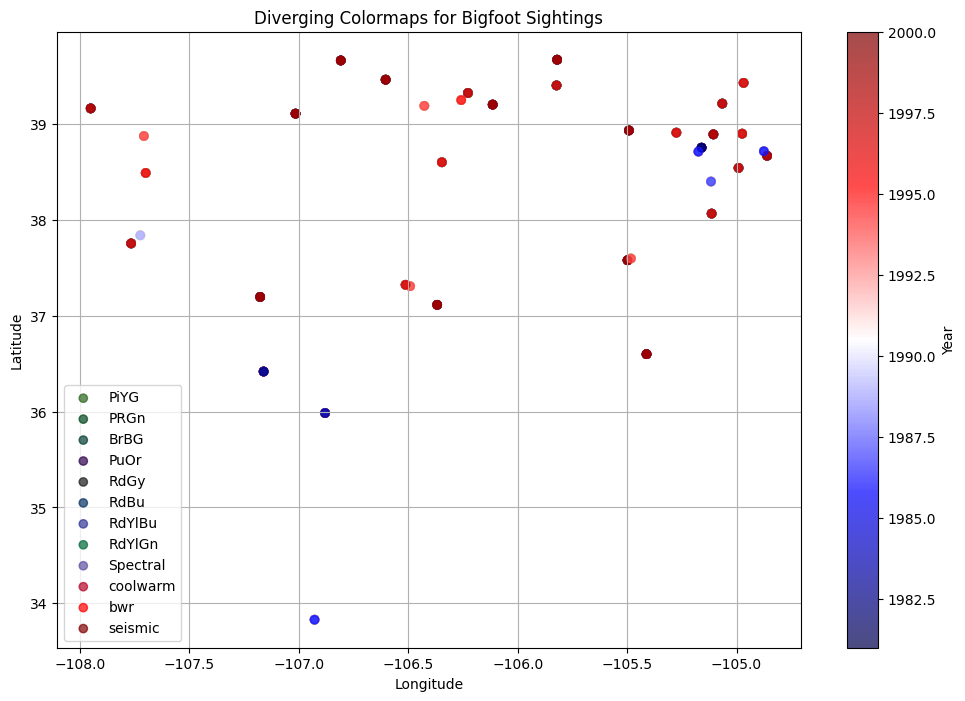

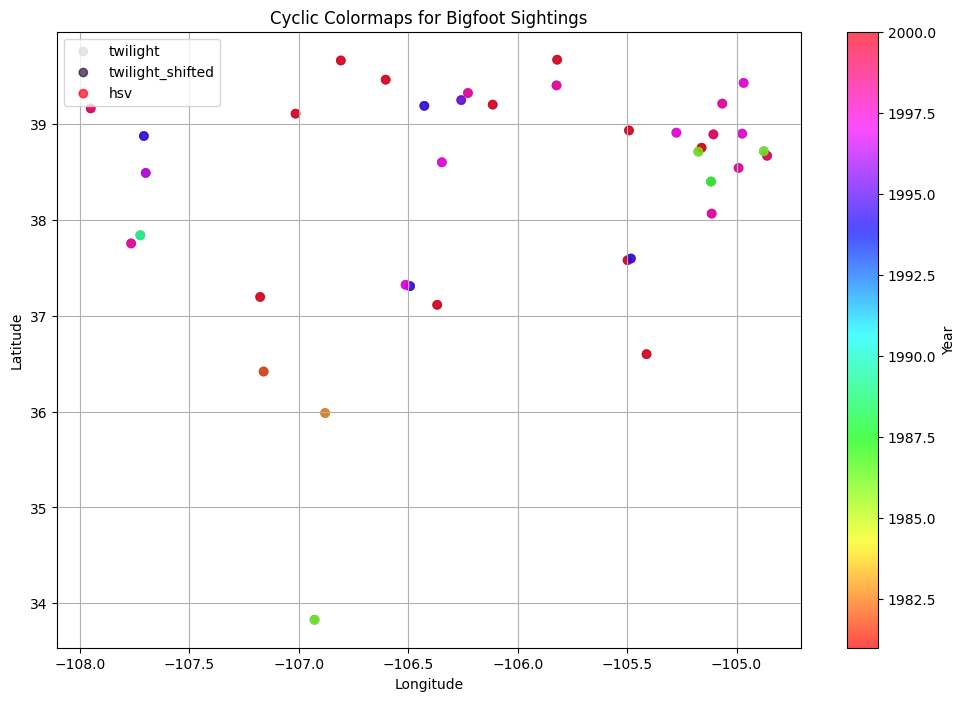

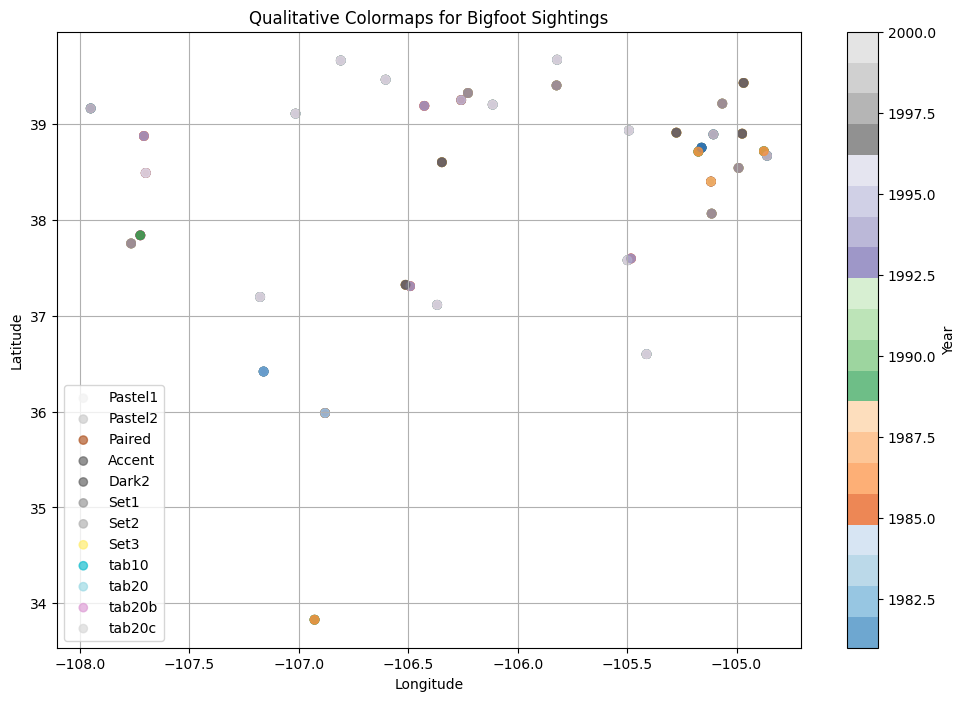

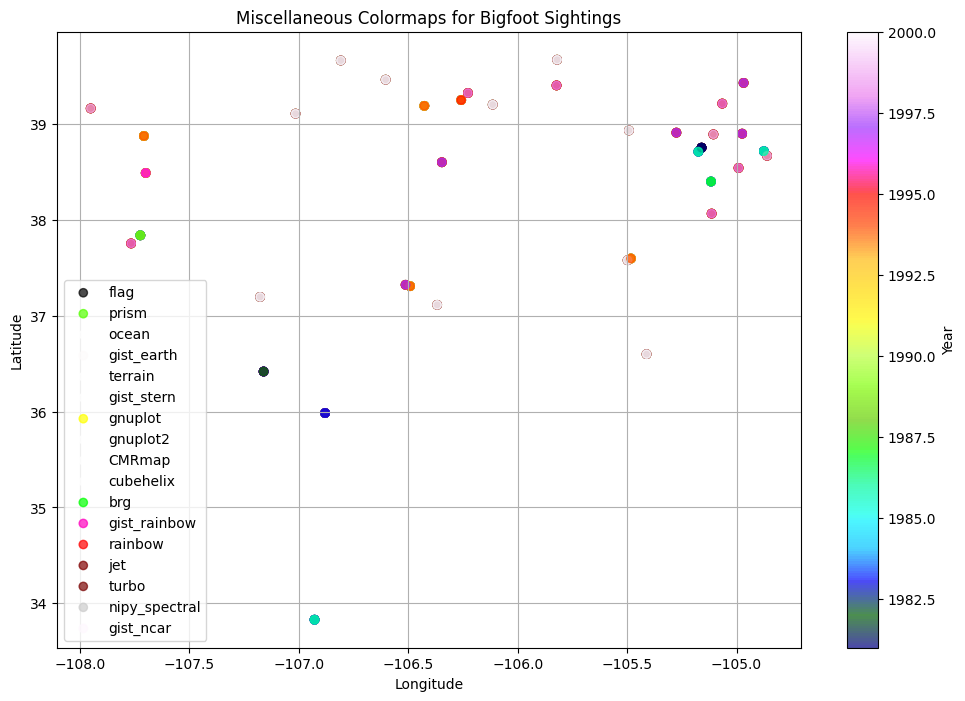

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Colormaps included with Matplotlib
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar'])]

# Gradient for the colormap,
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list):
    figh = len(cmap_list) * 0.22 + 0.35 + 0.15
    fig, axs = plt.subplots(nrows=len(cmap_list), figsize=(6.4, figh), gridspec_kw={'top': 1-.35/figh, 'bottom': .15/figh, 'left': 0.2, 'right': 0.99})
    axs[0].set_title(f"{cmap_category} colormaps", fontsize=14)

    for ax, cmap_name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=cmap_name)
        ax.text(-.01, .5, cmap_name, va='center', ha='right', fontsize=10, transform=ax.transAxes)
        ax.set_axis_off()

# Sample data
data_file = '/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/bigfoot_locations.csv'

# Convert the data into a DataFrame
df = pd.read_csv(data_file, low_memory=False)

# Convert the "timestamp" column to a proper datetime format with 'coerce' option
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

# Filter the data for bigfoot sightings between 1980 and 2000
bf_sightings = df[(df['timestamp'].dt.year >= 1980) & (df['timestamp'].dt.year <= 2000)].copy()

# Convert 'longitude' and 'latitude' columns to numeric using .loc
bf_sightings['longitude'] = pd.to_numeric(bf_sightings['longitude'], errors='coerce')
bf_sightings['latitude'] = pd.to_numeric(bf_sightings['latitude'], errors='coerce')

# Define latitude and longitude ranges
latitude_range = (33, 40)
longitude_range = (-108, -104)

# Filter the data within the specified latitude and longitude ranges
filtered_sightings = bf_sightings[
    (bf_sightings['latitude'] >= latitude_range[0]) & (bf_sightings['latitude'] <= latitude_range[1]) &
    (bf_sightings['longitude'] >= longitude_range[0]) & (bf_sightings['longitude'] <= longitude_range[1])
].copy()

# Plot each colormap
for cmap_category, cmap_list in cmaps:
    plt.figure(figsize=(12, 8))
    plt.title(f"{cmap_category} Colormaps for Bigfoot Sightings")

    for cmap_name in cmap_list:
        plt.scatter(
            filtered_sightings['longitude'],
            filtered_sightings['latitude'],
            c=filtered_sightings['timestamp'].dt.year,
            cmap=cmap_name,
            alpha=0.7,
            label=cmap_name
        )

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar(label='Year')
    plt.legend()
    plt.grid(True)
    plt.show()

**Response (model)**:

Sure, here are the scattering plots :

[image of the query]

And here is the code:

[CODE]

I hope this is helpful!